<a href="https://colab.research.google.com/github/opentrainingcamp/python/blob/main/Notebook/objets/paradigme_objet_Heritage_composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L’orienté objet : lier les opérations au type

* Attributs:
    * d'instances
    * de classe
* méthodes

## Notion d'arbre d'héritage dans un espace de nommage

Un espace de nommage est un nom donné à un groupe d'élements. Les répartoire sont un exemple. Les espaces de nommage sont récursif un espace contient aussi d'autres espace de nommage.

> NAMESPACE :== ELEM\* | NAMESAPCE\*
>
> ELEM :== variables | definitons de fonction | definition de classes 


Essayer [Espace de nommage et import](https://github.com/ISSAE/UTC503/tree/master/Seances/namesapce) de faire `python principal.py`

... discussion ... 



## L'arbre d'heritage dans le paradigme objet à la Python

Des éléments accessibles au niveaux des instances et d'autres au niveaux des classes. 

En introduction, nous avons vu que nous avions une relation entre l'instance et la classe qui crée cette instance. C'est-à-dire que lorsque l'on cherche un attribut dans une instance, si on ne le trouve pas dans l'espace de nommage de l'instance, on remonte et on arrive dans la classe. 

> Classe => instance
> 
> instance.elem > si existe dans instance utilise elem sinon recherche elem dans la Classe > Classe.elem sinon erreur


Cette notion est ue notion d'arbre d'heritage. Cette notion d'arbre d'héritage s'étend également aux classes. Les classes peuvent hériter d'autres classes et on peut donc avoir un arbre d'héritage qui va partir 
> des instances, >> remonter aux classes, >> et remonter aux classes dont héritent ces classes. 




In [ ]:
class C1:
  pass

class C2:
  pass

class C(C1,C2):
  pass



On crée deux classes C1 et C2. Et ensuite, on crée une troisième classe C, qui hérite de C1 et C2. Cette notion d'héritage est représentée par des parenthèses mises après le nom de la classe, et dans ces parenthèses, on va mettre la liste des classes dont on hérite.

In [ ]:
c1 = C1() # new C1()
c2 = C2()
c  = C()

In [ ]:
type(c)

__main__.C

On créé 3 objets (instance de C1,C2 et C)

* En fait, on va appeler la classe C une classe, et les classes C1 et C2 les super-classes de C. 
* On peut également dire en regardant le problème dans l'autre sens, que C1 et C2 sont des classes, et que C est une sous-classe de C1 et C2. 

![](https://issae.github.io/UTC503/Seances/Objets/heritage001.png)



In [ ]:
i1 = C()
i2 = C()

Ensuite, si on crée des instances, I1 et I2, ces instances I1 et I2 sont des objets qui vont hériter de la classe. Et en fait, on remarque maintenant que les instances, la classe et les super-classes forment ce que l'on appelle un arbre d'héritage. 

![](https://github.com/ISSAE/UTC503/raw/master/Seances/Objets/arbreHeritage.png)

Lorsque on cherche un attribut dans l'instance, si on ne le trouve pas dans l'espace de nommage de l'instance, on remonte dans sa classe ; si on ne le trouve pas dans la classe, on remonte dans les super-classes. Les super-classes étant des classes tout à fait comme les autres, elles peuvent elles-mêmes hériter d'autres classes et on peux donc avoir un arbre d'héritage qui est très grand.... 

## Definissons un exemple Le parallélogramme et ses dérivés: 

En géométrie, un parallélogramme est un quadrilatère dont les segments diagonaux se coupent en leurs milieux

et les cas particuliers

* Un losange est un parallélogramme ayant au moins deux côtés consécutifs de même longueur. Il est même équilatéral.
* Un rectangle est un parallélogramme ayant au moins un angle droit. Il est même équiangle.
* Un carré est un losange rectangle.

## Commençons par définir un segment par deux points

In [ ]:
class Point:
  ''' point et vecteur à la foi définit par un couple x,y '''

  # le constructeur Point(int x, int y)
  def __init__(self, x=0, y=0):
    self.x = x
    self.y = y

  def __getitem__(self, i):
    if (i==0):
      return self.x
    elif (i==1):
      return self.y
    else:
      raise Exception("Indice hors limites")

  def __len__(self):
    return 2

  def __add__(self, autre):
    return Point(self.x+autre.x, self.y+autre.y)

  def __mult__(self, autre):
    ''' produit cartésien '''
    
    return self.x*autre.x + self.y*autre.y

  def for_plot(self, plot):
    plot(self.x,self.y,'o-')

  def __str__(self):
    return f'<<Point {self.x},{self.y}>>'


In [ ]:
p = Point()
print(p)

str(p)
len(p)

<<Point 0,0>>


2

In [ ]:
p1 = Point(10,11)
p2 = Point(20,21)
print(p1,p2)

<<Point 10,11>> <<Point 20,21>>


In [ ]:
print(p1+p2)

<<Point 30,32>>


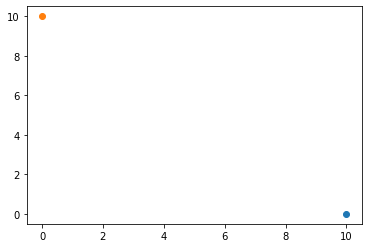

In [ ]:
p1 = Point(10,0)
p2 = Point(0,10)

import matplotlib
import matplotlib.pyplot as plt

p1.for_plot(plt.plot)
p2.for_plot(plt.plot)
plt.show()

## Composition

In [ ]:
class Segment:
  def __init__(self, p1, p2):
    ''' Un segment définit par 2 points '''
    # Et si p1 et p2 sont pas des points!!!
    self.p1 = p1
    self.p2 = p2

  def milieu(self):
    return Point((self.p1.x+self.p2.x)/2,(self.p1.y+self.p2.y)/2)
  
  def taille(self):
    import math
    return math.hypot(self.p2.x-self.p1.x, self.p2.y-self.p1.y)

  def for_plot(self, plot):
    plot([self.p1.x,self.p2.x],[self.p1.y,self.p2.y],'o-')

  def __str__(self):
    return f'<<Segment {self.p1},{self.p2}>>'
  

<<Segment <<Point 10,0>>,<<Point 0,10>>>>


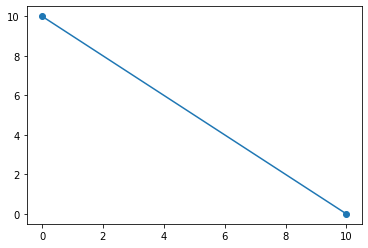

In [ ]:
s=Segment(p1,p2)
print(s)
s.for_plot(plt.plot)
plt.show()

In [ ]:
print(s.milieu())

<<Point 5.0,5.0>>


In [ ]:
class Segment_bis(Segment):
  def __init__(self, x1, y1, x2, y2):
    super().__init__(Point(x1, y1), Point(x2,y2))
    self.X=[x1,x2]
    self.Y=[y1,y2]

  def for_plot(self, plot):
    plot(self.X,self.Y,"x-")


<<Point 17.5,17.5>>


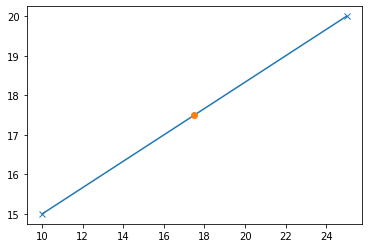

In [ ]:
s2 = Segment_bis(10,15,25,20)

s2.for_plot(plt.plot)
print(s2.milieu())
s2.milieu().for_plot(plt.plot)
plt.show()

## Un autre sans héritage avec héritage

In [ ]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

class Square:
    def __init__(self, length):
        self.length = length

    def area(self):
        return self.length * self.length

    def perimeter(self):
        return 4 * self.length

In [ ]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

# Here we declare that the Square class inherits from the Rectangle class
class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)

## Expression binaire 

* EXP $\Rightarrow$ EXPB | CONST
* EXPB $\Rightarrow$ (EXP OP EXP)
* CONST $\Rightarrow$ tout type numérique
* OP $\Rightarrow$ p | - | * | / | ...

Une expression binaire est une expression. Une constante est une expression..

Si nous modélisons nous aurons par exemple

In [ ]:
class Exp:
    def __str__(self):
        pass
    def infixe(self):
        pass
    def postfixe(self):
        pass
    def prefixe(self):
        pass
    def eval():
        pass

In [ ]:


class Const(Exp):
  """ Les constante des expression arithmétique""" 
  def __init__(self,v):
    """ e attribut d'objet contenant le nombre"""
    self.e=v
  # def __str__(self):
  #  return f"C:{self.e}"
  def __str__(self):
    return "C:"+str(self.e)
  def postfixe(self):
        return f"C:{self.e}"
  def prefixe(self):
        return f"C:{self.e}"
  def eval(self):
    return self.e
    
class ExpB(Exp):
    """ Les Expression binaire des expression arithmétique""" 
    def __init__(self, op, e1, e2):
        """ Expression binaire est définit par
            un operateur : op exemple + - *
            Une expression gauche e1: par exemple 2 ou (2+3)
            Une expression droite e2:
            (e1 op e2)
            """
        self.op=op
        self.e1=e1
        self.e2=e2
    def __str__(self):
        return f"({self.e1} {self.op} {self.e2})"
    # def __str__(slef):
    #    return "("+str(self.e1)+" "+str(self.op)+ " "+str(self.e2)+")"
    def postfixe(self):
        return f"{self.e1.postfixe()} {self.e2.postfixe()} {self.op}"
    
    def prefixe(self):
        return f"{self.op}({self.e1.prefixe()},{self.e2.prefixe()})"
    
    def eval(self):
        if self.op == '+':
            return self.e1.eval() + self.e2.eval()
        elif self.op == '-':
            return self.e1.eval() - self.e2.eval()
        elif self.op == '*':
            return self.e1.eval() * self.e2.eval()
        else:
            raise SyntaxError("Pas un operateur connue "+op)
    

In [ ]:
c1=Const(1) # 1
c2=Const(3.5) # 3.5
eb1=ExpB('+',c1,c2) # (1 + 3.5)

In [ ]:
print(c1)
print(c2)
print(eb1)

C:1
C:3.5
(C:1 p C:3.5)


In [ ]:
print(eb1.eval())

4.5


In [ ]:
c1.infixe()

In [ ]:
eb1.eval()

4.5

In [ ]:
eb1

In [ ]:
print(c1, c2, eb1, sep=' - ')

C:1 - C:3.5 - (C:1 + C:3.5)


In [ ]:
eb2=ExpB('-', eb1,c1)

In [ ]:
print(eb2, '=', eb2.eval())

((C:1 + C:3.5) - C:1) = 3.5


In [ ]:
eb3=ExpB('*', eb1,eb2)

In [ ]:
print(eb3, '=', eb3.eval())

((C:1 + C:3.5) * ((C:1 + C:3.5) - C:1)) = 15.75


In [ ]:
print(eb3.postfixe(), eb3.prefixe(), eb3.infixe(), sep='\n')

C:1 C:3.5 + C:1 C:3.5 + C:1 - *
*(+(C:1,C:3.5),-(+(C:1,C:3.5),C:1))
None


In [ ]:
class NonImplemente(Exception):
  pass

In [ ]:
class Exp:
    def __str__(self):
        raise NonImplemente("__str__ de Exp")
    def infixe(self):
        raise NonImplemente("infixe de Exp")
    def postfixe(self):
        raise NonImplemente("postfixe de Exp")
    def prefixe(self):
        raise NonImplemente("prefixe de Exp")
    def eval():
        raise NonImplemente("eval de Exp")


In [ ]:
class Const(Exp):
  """ Les constante des expression arithmétique""" 
  def __init__(self,v):
    """ e attribut d'objet contenant le nombre"""
    self.e=v
  # def __str__(self):
  #  return f"C:{self.e}"
  def __str__(self):
    return "C:"+str(self.e)
  def postfixe(self):
        return f"C:{self.e}"
  def prefixe(self):
        return f"C:{self.e}"
  def eval(self):
    return self.e
    

In [ ]:
class ExpB(Exp):
    """ Les Expression binaire des expression arithmétique""" 
    def __init__(self, op, e1, e2):
        """ Expression binaire est définit par
            un operateur : op exemple + - *
            Une expression gauche e1: par exemple 2 ou (2+3)
            Une expression droite e2:
            (e1 op e2)
            """
        if (op in ['+', '-', '*', '/']) and isinstance(e1, Exp) and isinstance(e2,Exp):
          self.op=op
          self.e1=e1
          self.e2=e2
        else:
          raise Exception("Mauvais paramétre du contructeur")
    def __str__(self):
        return f"""({self.e1} {self.op} {self.e2})"""
    # def __str__(slef):
    #    return "("+str(self.e1)+" "+str(self.op)+ " "+str(self.e2)+")"
    def postfixe(self):
        return f"{self.e1.postfixe()} {self.e2.postfixe()} {self.op}"
    
    def prefixe(self):
        return f"{self.op}({self.e1.prefixe()},{self.e2.prefixe()})"
    
    def eval(self):
        if self.op == '+':
            return self.e1.eval() + self.e2.eval()
        elif self.op == '-':
            return self.e1.eval() - self.e2.eval()
        elif self.op == '*':
            return self.e1.eval() * self.e2.eval()
        else:
            raise SyntaxError("Pas un operateur connue "+op)
    

In [ ]:
c1 = Const(10)
# c1.infixe()
isinstance(c1,Exp)
eb1 = ExpB("+", c1, Const(20))
print(eb1,eb1.eval())

(C:10 + C:20) 30


In [ ]:
eb2 = ExpB('+', c1, 3)

Exception: ignored

In [ ]:
class A:
  pass
class B(A):
  pass

In [ ]:
b = B()
a = A()

In [ ]:
isinstance(b, A)

True

In [ ]:
B.__mro__

(__main__.B, __main__.A, object)